## Deep Learning applied on MNIST
In the first part, we learned how to use a simple CNN to classify MNIST. Now we going to expand out knowledge using a Deep Neural network.
Architechture of our network is :
* (Input) -> [batch_size.28,28,1] >> Apply 32 filters of [5x5]
* (Convulation Layer 1) -> [batch_size,28,28,32]
* (Max Pooling 1) -> [?,28,28,32]
* (Convulation Layer 2) -> [?,14,14,64]
* (ReLU 2) -> [?,14,14,64]
* (Max Pooling 2) -> [?,7,7,64]
* [Fully connected Layer 3] -> [1X1024]
* [ReLU3] -> [1X1024]
* [Drop out] -> [1X1024]
* [Final Connnected Layer 4] -> [1X10]

The next cells will explore this new architecture . 

### Starting the Code


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import tensorflow as tf

sess = tf.InteractiveSession()

In [5]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [6]:
width = 28
height =28
flat = width*height 
class_output =10


#### Converting images of the dataset to tensors 

The input image is 28 pixels by 28 pixels, 1 channel (grayscale). In this case, the first dimension is the batch number of the image, and can be of any size (so we set it to -1). The second and third dimensions are width and height, and the last one is the image channels.



In [9]:
x  = tf.placeholder(tf.float32, shape=[None, flat])
y_ = tf.placeholder(tf.float32, shape=[None, class_output])

In [10]:
x_images = tf.reshape(x,[-1,28,28,1])
x_images

<tf.Tensor 'Reshape:0' shape=(?, 28, 28, 1) dtype=float32>

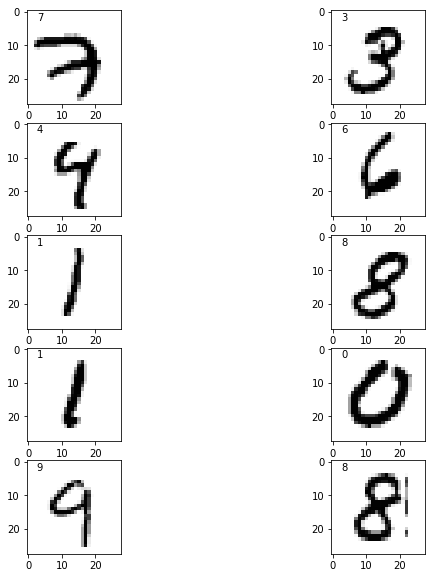

In [11]:
left= 2.5
top = 2.5

fig = plt.figure(figsize=(10,10))

for i in range(10):
    ax = fig.add_subplot(5,2,i+1)
    im = np.reshape(mnist.train.images[i,:], [28,28])
    label = np.argmax(mnist.train.labels[i,:])
    ax.imshow(im, cmap='Greys')
    ax.text(left, top, str(label))

### Convulation layer 1

**Defining kernal weights and bias**
Kernel/Filter size : 5X5
Input channel :1 (greyscale)
we need 32 different filters maps pn each image , 
the output of convulation layer would be 28X28X32

In this step we create a filter/kernel tensor of shape [filter_height, filter_weight, in_channels , out_channels]


In [12]:
W_conv1 = tf.Variable(tf.truncated_normal([5, 5, 1, 32], stddev=0.1))
b_conv1 = tf.Variable(tf.constant(0.1, shape=[32])) # need 32 biases for 32 outputs

<img src="https://ibm.box.com/shared/static/vn26neef1nnv2oxn5cb3uueowcawhkgb.png" style="width: 800px; height: 400px;" alt="HTML5 Icon" >

</h4>Convolve with weight tensor and add biases.</h4>

To create convolutional layer, we use <b>tf.nn.conv2d</b>. It computes a 2-D convolution given 4-D input and filter tensors.

Inputs:
- tensor of shape [batch, in_height, in_width, in_channels]. x of shape [batch_size,28 ,28, 1]
- a filter / kernel tensor of shape [filter_height, filter_width, in_channels, out_channels]. W is of size [5, 5, 1, 32]
- stride which is  [1, 1, 1, 1]. The convolutional layer, slides the "kernel window" across the input tensor. As the input tensor has 4 dimensions:  [batch, height, width, channels], then the convolution operates on a 2D window on the height and width dimensions. __strides__ determines how much the window shifts by in each of the dimensions. As the first and last dimensions are related to batch and channels, we set the stride to 1. But for second and third dimension, we could set other values, e.g. [1, 2, 2, 1]
    
    
Process:
- Change the filter to a 2-D matrix with shape [5\*5\*1,32]
- Extracts image patches from the input tensor to form a *virtual* tensor of shape `[batch, 28, 28, 5*5*1]`.
- For each batch, right-multiplies the filter matrix and the image vector.

Output:
- A `Tensor` (a 2-D convolution) of size tf.Tensor 'add_7:0' shape=(?, 28, 28, 32)- Notice: the output of the first convolution layer is 32 [28x28] images. Here 32 is considered as volume/depth of the output image.

In [14]:
convolve1= tf.nn.conv2d(x_images, W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1

#### Apply the ReLU activation Function

In this steo we just go through all outputs convulation layers , and whatever a negative number occurs , we swao it out for a 0 . It is called ReLU activation function .

Let f(x) is ReLU activation function $f(x) = max(0,x)$


In [15]:
h_conv1 = tf.nn.relu(convolve1)

#### Apply Max Pooling

<b>max pooling</b> is a form of non-linear down-sampling. It partitions the input image into a set of rectangles and, and then find the maximum value for that region. 

Lets use <b>tf.nn.max_pool</b> function to perform max pooling. 
<b>Kernel size:</b> 2x2 (if the window is a 2x2 matrix, it would result in one output pixel)  
<b>Strides:</b> dictates the sliding behaviour of the kernel. In this case it will move 2 pixels everytime, thus not overlapping. The input is a matrix of size 28x28x32, and the output would be a matrix of size 14x14x32.

<img src="https://ibm.box.com/shared/static/kmaja90mn3aud9mro9cn8pbbg1h5pejy.png" alt="HTML5 Icon" style="width: 800px; height: 400px;"> 



In [19]:
conv1 = tf.nn.max_pool(h_conv1, ksize=[1,2,2,1], strides =[1,2,2,1], padding='SAME')


#### First Layer Completed !!!

### Convulation Layer 2

** Weighs and Biases of Kernels **
We apply the convulation again in this layer. Lets look at second layer kernel:
* Filter/Kerne :5X5
* Input channels : 32
* 64 output feature maps 

**Notice** here the input is 14X14X32 , the filter of size [5X5X32] , we use 64 filter of size [5X5X32] and the outpit of convulation layer would be 64 convolved images .

<b>Notice:</b> the convolution result of applying a filter of size [5x5x32] on image of size [14x14x32] is an image of size [14x14x1], that is, the convolution is functioning on volume.

In [20]:
W_conv2 = tf.Variable(tf.truncated_normal([5,5,32,64], stddev = 0.1))
b_conv2 = tf.Variable(tf.constant(0.1,shape=[64])) #need 63 biases for output

**Convolve image with weight and add biases**

In [21]:
convolve2 = tf.nn.conv2d(conv1,W_conv2,strides=[1,1,1,1],padding='SAME')+ b_conv2

**Apply the ReLU activation Function**


In [22]:
h_conv2 = tf.nn.relu(convolve2)

**Apply the max pooling ** 

In [23]:
conv2 = tf.nn.max_pool(h_conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME') #max_pool_2x2
conv2

<tf.Tensor 'MaxPool_1:0' shape=(?, 7, 7, 64) dtype=float32>

The output of the second layer is ** 64 matrix , [7X7] **
### Second Layer Complete !!

### Fully Connected Layer 

You need a fully connected layer to use the Softmax and create the probabilities in the end. Fully connected layers take the high-level filtered images from previous layer, that is all 64 matrices, and convert them to a flat array.

So, each matrix [7x7] will be converted to a matrix of [49x1], and then all of the 64 matrix will be connected, which make an array of size [3136x1]. We will connect it into another layer of size [1024x1]. So, the weight between these 2 layers will be [3136x1024]


<img src="https://ibm.box.com/shared/static/pr9mnirmlrzm2bitf1d4jj389hyvv7ey.png" alt="HTML5 Icon" style="width: 800px; height: 400px;"> 


#### Flattening Second Layer

In [25]:
layer2_matrix = tf.reshape(conv2, [-1, 7 * 7 * 64]) 

<h4>Weights and Biases between layer 2 and 3</h4>
Composition of the feature map from the last layer (7x7) multiplied by the number of feature maps (64); 1027 outputs to Softmax layer

In [27]:
W_fc1 = tf.Variable(tf.truncated_normal([7 * 7 * 64, 1024], stddev=0.1))
b_fc1 = tf.Variable(tf.constant(0.1, shape=[1024])) # need 1024 biases for 1024 outputs

#### Matrix Muliplication (applying weights and biases)


In [28]:
fcl = tf.matmul(layer2_matrix,W_fc1)+ b_fc1

#### Apply ReLU activation Function

In [29]:
h_fc1 = tf.nn.relu(fcl)
h_fc1

<tf.Tensor 'Relu_2:0' shape=(?, 1024) dtype=float32>

### Third Layer Complete!!!

In [30]:
keep_prob = tf.placeholder(tf.float32)
layer_drop = tf.nn.dropout(h_fc1, keep_prob)
layer_drop

<tf.Tensor 'dropout/mul:0' shape=(?, 1024) dtype=float32>

<h4>Readout Layer (Softmax Layer)</h4>
Type: Softmax, Fully Connected Layer.

#### Weights and Biases

In [33]:
W_fc2 = tf.Variable(tf.truncated_normal([1024,10],stddev=0.1))
b_fc2 = tf.Variable(tf.constant(0.1,shape=[10])) #10 possiblities for 10 digits

<h4>Matrix Multiplication (applying weights and biases)</h4>

In [34]:
fc=tf.matmul(layer_drop, W_fc2) + b_fc2

<h4>Apply the Softmax activation Function</h4>
<b>softmax</b> allows us to interpret the outputs of <b>fcl4</b> as probabilities. So, <b>y_conv</b> is a tensor of probabilities.

In [36]:
y_CNN= tf.nn.softmax(fc)
y_CNN

<tf.Tensor 'Softmax:0' shape=(?, 10) dtype=float32>

<h2>Summary of the Deep Convolutional Neural Network</h2>
Now is time to remember the structure of  our network
#### 0) Input - MNIST dataset
#### 1) Convolutional and Max-Pooling
#### 2) Convolutional and Max-Pooling
#### 3) Fully Connected Layer
#### 4) Processing - Dropout
#### 5) Readout layer - Fully Connected
#### 6) Outputs - Classified digits

## Define and Train the Model
### Define the loss function

We need to compare our output, layer4 tensor, with ground truth for all mini_batch. we can use <b>cross entropy>/b> to see how bad our CNN is working - to measure the error at a softmax layer.

The following code shows an toy sample of cross-entropy for a mini-batch of size 2 which its items have been classified. You can run it (first change the cell type to <b>code</b> in the toolbar) to see how cross entropy changes.

In [37]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_CNN), reduction_indices=[1]))

### Define the optimizer 

It is obvious that we want minimize the error of our network which is calculated by cross_entropy metric. To solve the problem, we have to compute gradients for the loss (which is minimizing the cross-entropy) and apply gradients to variables. It will be done by an optimizer: GradientDescent or Adagrad. 

In [38]:
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

<h4>Define prediction</h4>
Do you want to know how many of the cases in a mini-batch has been classified correctly? lets count them.

In [39]:
correct_prediction = tf.equal(tf.argmax(y_CNN, 1), tf.argmax(y_, 1))

<h4>Define accuracy</h4>
It makes more sense to report accuracy using average of correct cases.

In [40]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

<h4>Run session, train</h4>

In [41]:
sess.run(tf.global_variables_initializer())



In [42]:
for i in range(20000):
    batch = mnist.train.next_batch(50)
    if i%100 == 0:
        train_accuracy = accuracy.eval(feed_dict={
            x:batch[0], y_: batch[1], keep_prob: 1.0})
        print("step %d, training accuracy %g"%(i, train_accuracy))
    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

step 0, training accuracy 0.1
step 100, training accuracy 0.82
step 200, training accuracy 0.9
step 300, training accuracy 0.94
step 400, training accuracy 0.9
step 500, training accuracy 0.98
step 600, training accuracy 0.9
step 700, training accuracy 0.98
step 800, training accuracy 0.98
step 900, training accuracy 0.98
step 1000, training accuracy 0.98
step 1100, training accuracy 0.98
step 1200, training accuracy 1
step 1300, training accuracy 0.98
step 1400, training accuracy 0.98
step 1500, training accuracy 1
step 1600, training accuracy 0.96
step 1700, training accuracy 0.96
step 1800, training accuracy 1
step 1900, training accuracy 1
step 2000, training accuracy 1
step 2100, training accuracy 0.96
step 2200, training accuracy 0.98
step 2300, training accuracy 1
step 2400, training accuracy 0.98
step 2500, training accuracy 0.92
step 2600, training accuracy 0.96
step 2700, training accuracy 0.98
step 2800, training accuracy 1
step 2900, training accuracy 0.98
step 3000, traini

#### Evaluate the Model
Print evaluation to user


In [52]:
n_batches = mnist.test.images.shape[0]
cummulative_accuracy = 0.0
for index in range(n_batches):
    batch = mnist.test.next_batch(50)
    cummulative_accuracy += accuracy.eval(feed_dict = {x : batch[0], y_: batch[1] , keep_prob :1.0})
print("test accuracy {}".format(cummulative_accuracy/n_batches))

test accuracy 0.9916020040512085


### Visualization

In [53]:
kernels = sess.run(tf.reshape(tf.transpose(W_conv1, perm=[2, 3, 0,1]),[32, -1]))

--2018-12-11 22:55:49--  http://deeplearning.net/tutorial/code/utils.py
Resolving deeplearning.net (deeplearning.net)... 132.204.26.28
Connecting to deeplearning.net (deeplearning.net)|132.204.26.28|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5097 (5.0K) [text/plain]
Saving to: ‘utils1.py’

utils1.py           100%[===================>]   4.98K  --.-KB/s    in 0s      

2018-12-11 22:55:52 (179 MB/s) - ‘utils1.py’ saved [5097/5097]



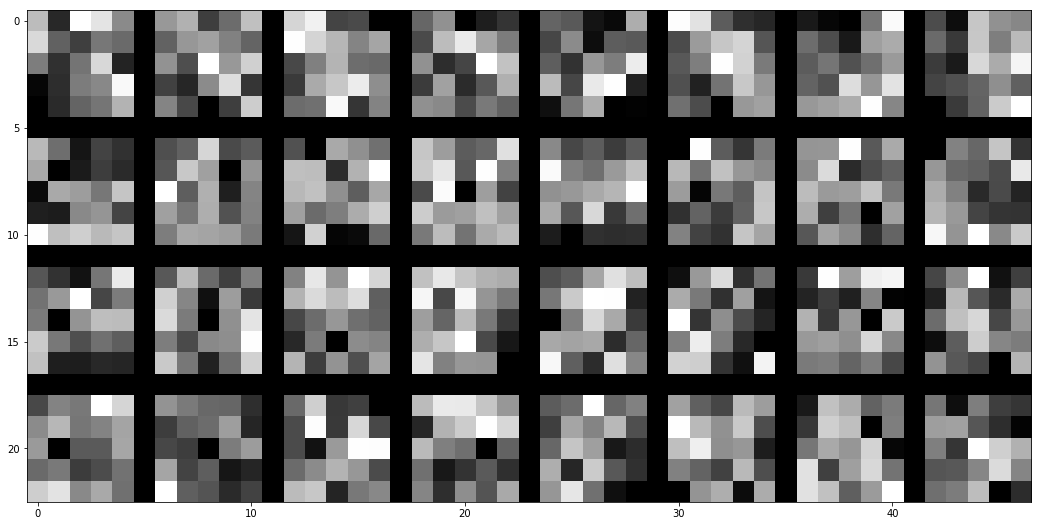

In [54]:
!wget --output-document utils1.py http://deeplearning.net/tutorial/code/utils.py
import utils1
from utils1 import tile_raster_images
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
image = Image.fromarray(tile_raster_images(kernels, img_shape=(5, 5) ,tile_shape=(4, 8), tile_spacing=(1, 1)))
### Plot image
plt.rcParams['figure.figsize'] = (18.0, 18.0)
imgplot = plt.imshow(image)
imgplot.set_cmap('gray')  

Do you want to see the output of an image passing through first convolution layer?


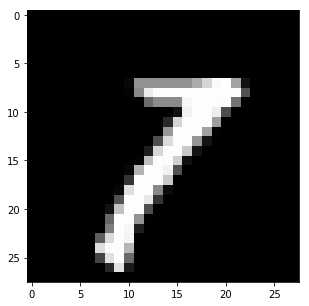

In [55]:
plt.rcParams['figure.figsize'] = (5.0, 5.0)
sampleimage = mnist.test.images[1]
plt.imshow(np.reshape(sampleimage,[28,28]), cmap="gray")

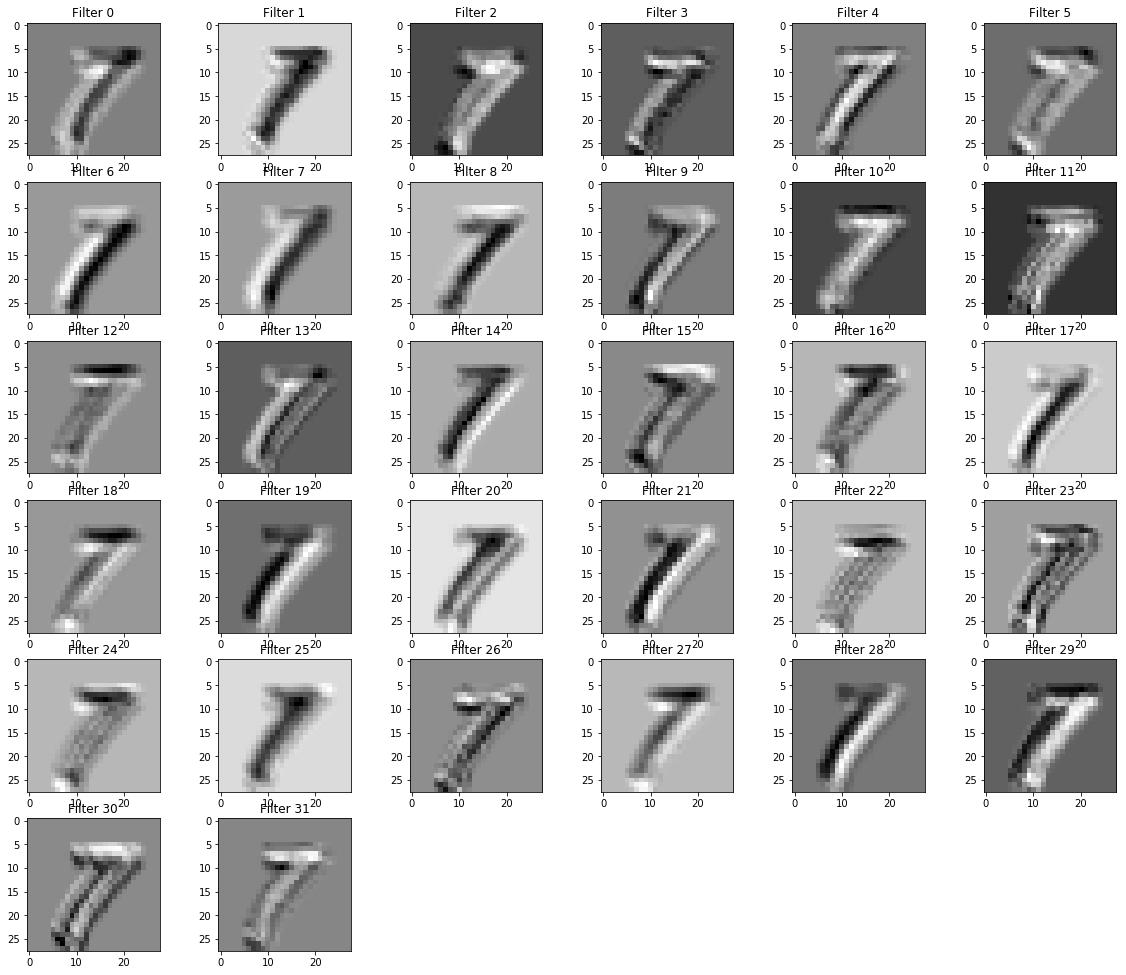

In [56]:
ActivatedUnits = sess.run(convolve1,feed_dict={x:np.reshape(sampleimage,[1,784],order='F'),keep_prob:1.0})
filters = ActivatedUnits.shape[3]
plt.figure(1, figsize=(20,20))
n_columns = 6
n_rows = np.math.ceil(filters / n_columns) + 1
for i in range(filters):
    plt.subplot(n_rows, n_columns, i+1)
    plt.title('Filter ' + str(i))
    plt.imshow(ActivatedUnits[0,:,:,i], interpolation="nearest", cmap="gray")

What about second convolution layer?

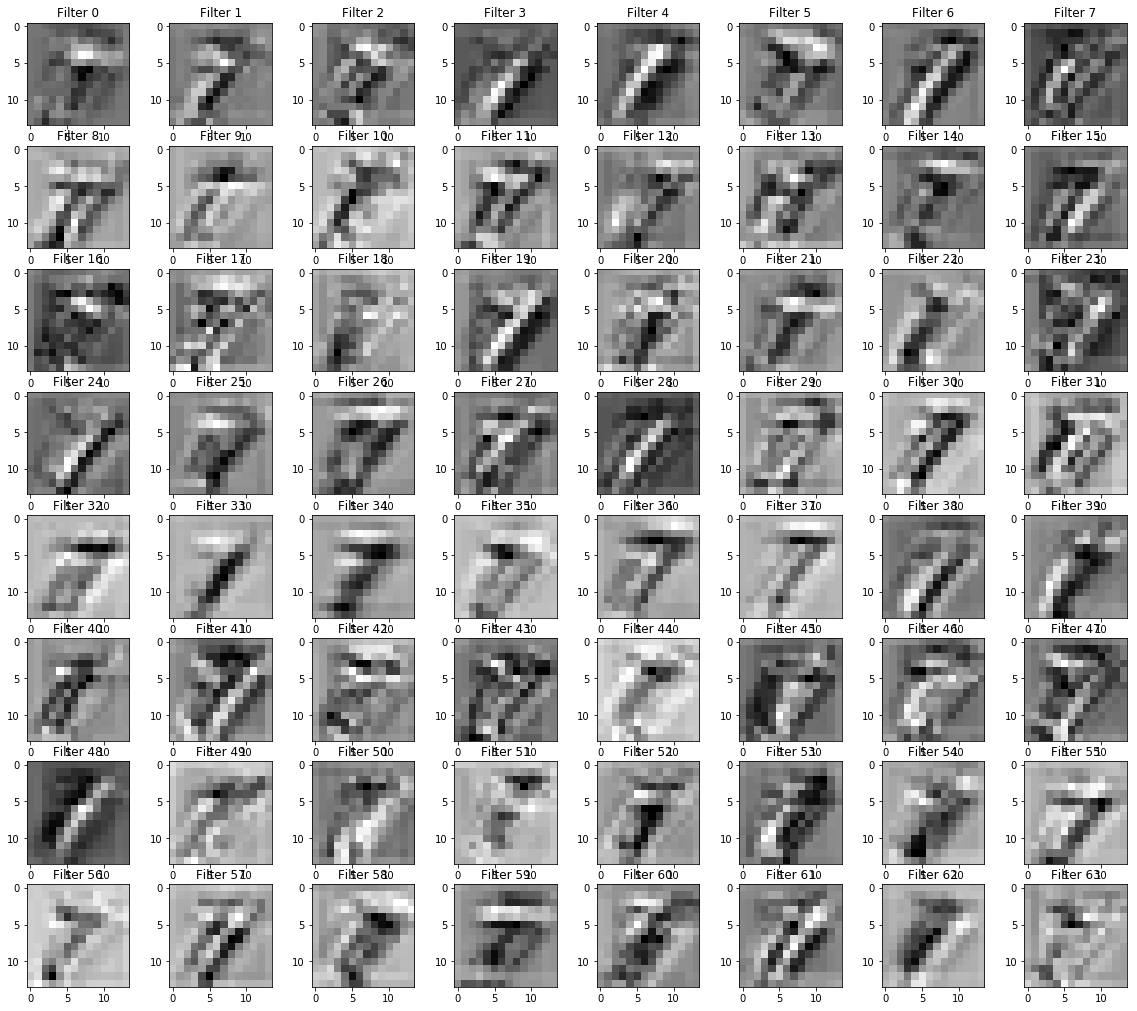

In [57]:
ActivatedUnits = sess.run(convolve2,feed_dict={x:np.reshape(sampleimage,[1,784],order='F'),keep_prob:1.0})
filters = ActivatedUnits.shape[3]
plt.figure(1, figsize=(20,20))
n_columns = 8
n_rows = np.math.ceil(filters / n_columns) + 1
for i in range(filters):
    plt.subplot(n_rows, n_columns, i+1)
    plt.title('Filter ' + str(i))
    plt.imshow(ActivatedUnits[0,:,:,i], interpolation="nearest", cmap="gray")

In [58]:
sess.close() #finish the session